In [ ]:
# based on section 5 of https://arxiv.org/pdf/1007.1727.pdf

In [130]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson
import seaborn as seb

In [131]:
# Plotting function

def plot_func(func, x=np.linspace(0,5,3001), logscale=False, ylim=[], xlabel='', ylabel=''):
    y = np.vectorize(func)(x)
    axes = plt.gca()
    if logscale: axes.set_yscale('log')
    if len(ylim) == 2: axes.set_ylim(ylim)
    if xlabel: axes.set_xlabel(xlabel)
    if ylabel: axes.set_ylabel(ylabel)
    plt.title(func.__name__)
    plt.plot(x,y)
    plt.show()

In [227]:
# Useful functions

def factorial(x):
    if x == 0:
        return 1
    elif x > 0:
        for i in range(1,int(x)):
            x = x * i
        return x

In [220]:
# Figure 3a pdf, f(q0|0)
def PDFQ0(q0):
    if q0 < 1e-10: q0 = 1e-10
    else:
        return np.exp(-q0*0.5)*(2*math.sqrt(2*math.pi*q0))**-1

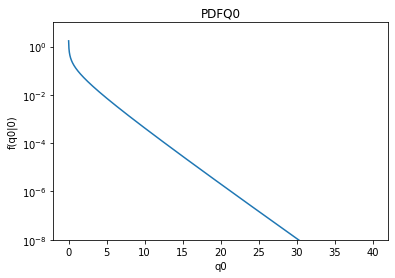

In [221]:
plot_func(PDFQ0, x=np.linspace(0,40,3001), logscale=True, ylim=[10**-8,10], xlabel='q0', ylabel='f(q0|0)')

In [326]:
# monte carlo for figure 3a: 
# 1) need to generate n, m based on inverse CDF of poisson distribution with expected values E[n], E[m]
# 2) compute q0 values then plot the histogram of q0 values and then normalize it
# Note: 24 bins from 0 to 40

In [322]:
# generate n, m based on inverse CDF of poisson distribution

def generate_nm(nexpec,mexpec,numev):
    ngen = [poisson.ppf(random.uniform(0,1),nexpec) for i in range(0,numev)]
    mgen = [poisson.ppf(random.uniform(0,1),mexpec) for i in range(0,numev)]
    return [ngen, mgen]


In [323]:
# Maximum Likelihood estimators for single bin
# tau, mu, s are input parameters and not included here
def mu_max(n,m): # for maximizing functions of 2 vars, b and mu in denominator of LLR
    return (n - m*tau**-1)*s**-1
def b_max(m): #for maximizing fucntions of 2 vars, b and mu in denominator of LLR
    return m*tau**-1
def b_max1(n,m): #maximize fxn of 1 var, b, in numerator of LLR
    return (n+m-(1+tau)*mu*s)*(2*(1+tau))**-1 + ( ((n+m-(1+tau)*mu*s)**2+4*(1+tau)*m*mu*s) * 0.25*(1+tau)**-2 )**0.5


In [324]:
# test statistics for single bin


def likelihood(mu,b,n,m): # s and tau are the only constants 
    return (mu*s+b)**n * (factorial(n))**-1 * math.exp(-(mu*s+b)) * (tau*b)**m * factorial(m)**-1 * math.exp(-tau*b)

def LLR(mu,n,m):
    return likelihood(mu,b_max1(n,m),n,m)*(likelihood(mu_max(n,m),b_max(m),n,m))**-1


def q0(n,m):
    if mu_max(n,m) > 0:
        return -2*math.log(LLR(0,n,m))
    else:
        return None

<function matplotlib.pyplot.show(*args, **kw)>

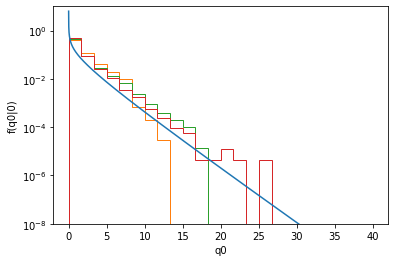

In [346]:
# Create and plot histogram


# input parameters
s = 10
b = [2, 5, 20]
tau = 1
mu = 0
numevents = 300000

# Expected # of events
def En(b):
    return mu*s+b
def Em(b):
    return tau*b
#print(f"En: {En} Em: {Em}")



axes = plt.gca()
axes.set_yscale('log')
axes.set_ylim(10**-8, 10)
axes.set_xlabel('q0')
axes.set_ylabel('f(q0|0)')

x = np.linspace(0,40,40000)
pdfs = np.vectorize(PDFQ0)(x)
plt.plot(x,pdfs)



for bval in b:
    q0s = []
    nm = generate_nm(En(bval),Em(bval),numevents)
    for evindex in range(numevents):
        q0val = q0(nm[0][evindex],nm[1][evindex])
        if q0val is not None:
            q0s.append(q0val)
    plt.hist(q0s,bins=24,range=(0,40),density=True,histtype='step')

plt.show

In [ ]:
# matplotlib color cycle: https://matplotlib.org/3.3.0/users/dflt_style_changes.html
# blue (PDF)
# orange (b=2)
# green (b=5)
# red (b=20)